In [2]:
import pyransac3d as pyrsc
import open3d as o3d
import os
import numpy as np

# Load saved point cloud and visualize it
path = r'C:\Users\Mama\Documents\research\pyRANSAC-3D\tests\dataset'.replace('\\','/')
pcd_load = o3d.io.read_point_cloud(os.path.join(path,"pcd.ply"))
# o3d.visualization.draw_geometries([pcd_load])
points = np.asarray(pcd_load.points)

print(pcd_load)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
PointCloud with 36 points.


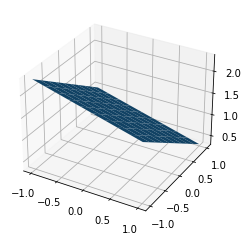

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a,b,c,d = 1,2,3,4

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

In [22]:
plane1 = pyrsc.Plane()
best_eq, best_inliers = plane1.fit(points, 0.01)

plane = pcd_load.select_by_index(best_inliers).paint_uniform_color([1, 0, 0])
# obb = plane.get_oriented_bounding_box()
# obb2 = plane.get_axis_aligned_bounding_box()
# obb.color = [0, 0, 1]
# obb2.color = [0, 1, 0]
not_plane = pcd_load.select_by_index(best_inliers, invert=True)

# o3d.visualization.draw_geometries([not_plane, plane, obb, obb2])
o3d.visualization.draw_geometries([not_plane, plane])

C:\Users\Mama\anaconda3\lib\site-packages\pyransac3d\plane.py:59: RuntimeWarning: invalid value encountered in true_divide
  vecC = vecC / np.linalg.norm(vecC)


In [28]:
array = np.array([[1,1,1,1,2,2,3,3,3],
                  [4,4,5,5,8,8,8,9,9]])

mask = np.array([0,0,0,0,1,1,1,1,1], dtype=np.bool_)
print(mask)
array = array * mask
print(array)

array = array[array > 0].reshape((2,-1))
print(array)

[False False False False  True  True  True  True  True]
[[0 0 0 0 2 2 3 3 3]
 [0 0 0 0 8 8 8 9 9]]
[[2 2 3 3 3]
 [8 8 8 9 9]]


In [27]:
array = np.zeros((4,4), dtype=np.bool_)
print(array)

array[0,:] = 1
print(array)


[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
[[ True  True  True  True]
 [False False False False]
 [False False False False]
 [False False False False]]


In [24]:
xyz = np.random.rand(100, 3)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.visualization.draw_geometries([pcd])